<a href="https://colab.research.google.com/github/SIRIGIREDDYDHANALAXMI/ML-project-1/blob/master/Basic_Movie_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
#dataset
Credits = pd.read_csv("//content//drive//My Drive//tmdb-movie-metadata//tmdb_5000_credits.csv")
print(Credits.head())
Movies = pd.read_csv("//content//drive//My Drive//tmdb-movie-metadata//tmdb_5000_movies.csv")
print(Movies.head())

   movie_id  ...                                               crew
0     19995  ...  [{"credit_id": "52fe48009251416c750aca23", "de...
1       285  ...  [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    206647  ...  [{"credit_id": "54805967c3a36829b5002c41", "de...
3     49026  ...  [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4     49529  ...  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

[5 rows x 4 columns]
      budget  ... vote_count
0  237000000  ...      11800
1  300000000  ...       4500
2  245000000  ...       4466
3  250000000  ...       9106
4  260000000  ...       2124

[5 rows x 20 columns]


In [0]:
print(Credits.shape)
print(Movies.shape)

(4803, 4)
(4803, 20)


In [0]:
#merge both credits and movies

cred = Credits.rename(columns={"movie_id":"id"})
dataset = Movies.merge(cred , on="id")
print(dataset.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')


AxesSubplot(0.125,0.125;0.62x0.755)


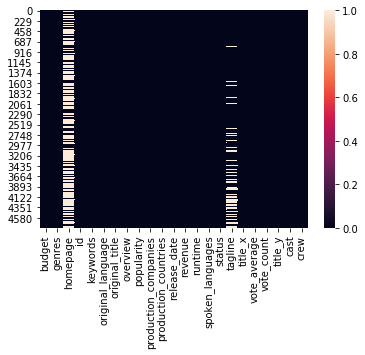

In [0]:
import seaborn as sns
print(sns.heatmap(dataset.isnull()))

AxesSubplot(0.125,0.125;0.62x0.755)


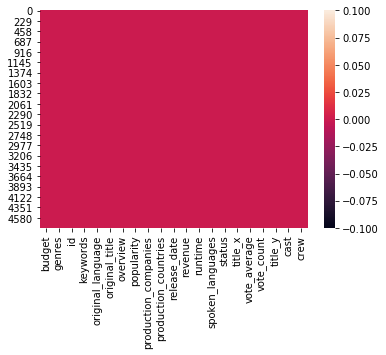

In [0]:
dataset = dataset.drop(columns=['homepage'], axis=1)

dataset = dataset.drop(columns=['tagline'],axis=1)
#print(sns.heatmap(dataset.isnull()))
dataset = dataset.fillna('')
print(sns.heatmap(dataset.isnull()))

Content based recommendation system 

lets do it depending on one feature "overview" of the movie

In [0]:
print(dataset["overview"].dtype)
print(dataset["overview"].head())

object
0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object


lets use nlp to understand overview ! coz it is written in sentences....
we are converting all these sentences into document matrix

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfvector= TfidfVectorizer(ngram_range = (1,3) , stop_words = "english" , analyzer ="word" , token_pattern = r'\w{1,}' , strip_accents = "unicode"  )

In [0]:
dataset["overview"] =  dataset["overview"].fillna('')
tfvmatrix = tfvector.fit_transform(dataset["overview"])
print(tfvmatrix)
print(tfvmatrix.dtype)

  (0, 182251)	0.16829929096400356
  (0, 166607)	0.16829929096400356
  (0, 88097)	0.16829929096400356
  (0, 239101)	0.16829929096400356
  (0, 152574)	0.16829929096400356
  (0, 247358)	0.16829929096400356
  (0, 169054)	0.16829929096400356
  (0, 154110)	0.16829929096400356
  (0, 64173)	0.16829929096400356
  (0, 145572)	0.16829929096400356
  (0, 169286)	0.16829929096400356
  (0, 35576)	0.16829929096400356
  (0, 1833)	0.16829929096400356
  (0, 8100)	0.16829929096400356
  (0, 182250)	0.16829929096400356
  (0, 166606)	0.16829929096400356
  (0, 88095)	0.16053072910417743
  (0, 239100)	0.16829929096400356
  (0, 152573)	0.16829929096400356
  (0, 247357)	0.16829929096400356
  (0, 169053)	0.16829929096400356
  (0, 154109)	0.16829929096400356
  (0, 64172)	0.16829929096400356
  (0, 145571)	0.16829929096400356
  (0, 169285)	0.16829929096400356
  :	:
  (4802, 14067)	0.08257876149369847
  (4802, 57621)	0.07756693406479091
  (4802, 14192)	0.06970437966183819
  (4802, 92772)	0.0767843294164623
  (4802, 8

In [0]:
print(tfvmatrix.shape)

(4803, 265992)


In [0]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfvmatrix , tfvmatrix)
print(sig[0])

[0.76159573 0.76159416 0.76159416 ... 0.76159416 0.76159416 0.76159416]


In [0]:
print(sig.shape)

(4803, 4803)


In [0]:
serial = pd.Series(dataset.index , index= dataset["original_title"]).drop_duplicates()

In [0]:
serial['Titanic']

25

In [0]:
print(serial)

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64


In [0]:
print(list(enumerate(sig[serial["Titanic"]])))

[(0, 0.7615941559557649), (1, 0.7615941580266147), (2, 0.7615941559557649), (3, 0.7615941675492635), (4, 0.7615941559557649), (5, 0.7615941661907749), (6, 0.7615941575441374), (7, 0.7615941559557649), (8, 0.761594161878349), (9, 0.7615941559557649), (10, 0.7615941584645729), (11, 0.7615941582323534), (12, 0.7615941628626977), (13, 0.7615941671544099), (14, 0.7615941601401895), (15, 0.7615941604397108), (16, 0.7615941559557649), (17, 0.7615941867654249), (18, 0.7615941597374396), (19, 0.7615941559557649), (20, 0.7615941587576889), (21, 0.7615941559557649), (22, 0.7615941559557649), (23, 0.7615941559557649), (24, 0.761594173822101), (25, 0.7615957348496382), (26, 0.7615941559557649), (27, 0.7615941559557649), (28, 0.7615941587650111), (29, 0.7615941559557649), (30, 0.7615941559557649), (31, 0.7615941624942636), (32, 0.7615941649835922), (33, 0.7615941559557649), (34, 0.7615941608909079), (35, 0.7615941579107146), (36, 0.7615941559557649), (37, 0.761594162293806), (38, 0.7615941608915113)

In [0]:
print(sorted(list(enumerate(sig[serial["Titanic"]])) , key = lambda x:x[1] , reverse = True))

[(25, 0.7615957348496382), (2289, 0.7615942206968352), (1269, 0.761594218964248), (296, 0.7615942177791964), (2143, 0.7615942018695403), (4287, 0.7615942009157215), (2287, 0.7615941992856039), (4575, 0.7615941966576791), (4035, 0.7615941946302882), (171, 0.7615941943196738), (4063, 0.7615941936433821), (3212, 0.7615941933330481), (770, 0.7615941927130923), (2902, 0.7615941921765452), (4228, 0.7615941915973391), (104, 0.7615941904971869), (4744, 0.7615941903238053), (1294, 0.7615941902482739), (775, 0.7615941898374955), (378, 0.7615941894883553), (2129, 0.7615941894706192), (3696, 0.7615941889364273), (3103, 0.7615941885162147), (2955, 0.7615941884783828), (4676, 0.7615941882926924), (4610, 0.761594187628567), (57, 0.7615941871575271), (3497, 0.7615941870266627), (17, 0.7615941867654249), (1554, 0.7615941859835232), (4231, 0.7615941859575831), (3534, 0.7615941858807977), (4146, 0.7615941848934297), (1112, 0.7615941846883632), (3411, 0.7615941845997839), (818, 0.7615941842366094), (1182,

In [0]:
k = sorted(list(enumerate(sig[serial["Titanic"]])) , key = lambda x:x[1] , reverse = True)
k =k[1:11]
result = dataset["original_title"].iloc[[i[0] for i in k]]
print(result)

2289                                         The Switch
1269                                  Raise the Titanic
296                                         End of Days
2143                                         Ghost Ship
4287                                            Niagara
2287                         I Can Do Bad All By Myself
4575                                  Napoleon Dynamite
4035                                              Stung
171     Master and Commander: The Far Side of the World
4063                                              Bully
Name: original_title, dtype: object


In [0]:
def recommend(title , sig=sig):
  index = serial[title]

  sigscore = list(enumerate(sig[index]))

  sigscore = sorted(sigscore , key=lambda x:x[1], reverse =True)

  sigscore = sigscore[1:11]

  movieindex = [i[0] for i in sigscore]

  return dataset["original_title"].iloc[movieindex]


In [0]:
recommend('Titanic')

2289                                         The Switch
1269                                  Raise the Titanic
296                                         End of Days
2143                                         Ghost Ship
4287                                            Niagara
2287                         I Can Do Bad All By Myself
4575                                  Napoleon Dynamite
4035                                              Stung
171     Master and Commander: The Far Side of the World
4063                                              Bully
Name: original_title, dtype: object